In [68]:
!pip install xgboost --root-user-action=ignore
!pip install shap --root-user-action=ignore


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import all you need</p>

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
import shap

In [70]:
df=pd.read_csv('/kaggle/input/transaction-dataset/transaction_dataset.csv')
df.head(50)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
5,5,6,0x000895ad78f4403ecd9468900e68d6ee506136fd,0,9900.12,375.48,20926.68,2,3,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
6,6,7,0x000d63fc5df52b0204374c2f5a3249779805d5d1,0,69.46,629.44,8660.35,25,11,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
7,7,8,0x000e001ab444fa8d6dc4a402f8d7cfc88fe8c64d,0,1497.39,176.84,319828.05,213,5,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,7.0,NaN,XENON
8,8,9,0x0012cb699c836049a4bbeaac2d8c4d47c688e0e4,0,0.00,0.00,496.62,1,1,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
9,9,10,0x0012f247c9f980eea0a9ad06893bfd95c3145794,0,2570.59,3336.01,30572.70,8,3,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,NaN,AICRYPTO


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA</p>

In [71]:
df.columns=df.columns.str.replace(' ','_')

In [72]:
df.shape

(9841, 51)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed:_0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg_min_between_sent_tnx                              9841 non-null   float64
 5   Avg_min_between_received_tnx                          9841 non-null   float64
 6   Time_Diff_between_first_and_last_(Mins)               9841 non-null   float64
 7   Sent_tnx                                              9841 non-null   int64  
 8   Received_Tnx                                          9841

In [74]:
df.describe ()

,Unnamed:_0,Index,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,...,_ERC20_max_val_rec,_ERC20_avg_val_rec,_ERC20_min_val_sent,_ERC20_max_val_sent,_ERC20_avg_val_sent,_ERC20_min_val_sent_contract,_ERC20_max_val_sent_contract,_ERC20_avg_val_sent_contract,_ERC20_uniq_sent_token_name,_ERC20_uniq_rec_token_name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [75]:
df.isnull().sum()

Unnamed:_0                                                 0
Index                                                      0
Address                                                    0
FLAG                                                       0
Avg_min_between_sent_tnx                                   0
Avg_min_between_received_tnx                               0
Time_Diff_between_first_and_last_(Mins)                    0
Sent_tnx                                                   0
Received_Tnx                                               0
Number_of_Created_Contracts                                0
Unique_Received_From_Addresses                             0
Unique_Sent_To_Addresses                                   0
min_value_received                                         0
max_value_received_                                        0
avg_val_received                                           0
min_val_sent                                               0
max_val_sent            

In [76]:
df.drop(columns=["_ERC20_most_sent_token_type","Index", "Address","_ERC20_most_rec_token_type",'Unnamed:_0'],inplace = True)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [77]:
df.isnull().sum()

FLAG                                                    0
Avg_min_between_sent_tnx                                0
Avg_min_between_received_tnx                            0
Time_Diff_between_first_and_last_(Mins)                 0
Sent_tnx                                                0
Received_Tnx                                            0
Number_of_Created_Contracts                             0
Unique_Received_From_Addresses                          0
Unique_Sent_To_Addresses                                0
min_value_received                                      0
max_value_received_                                     0
avg_val_received                                        0
min_val_sent                                            0
max_val_sent                                            0
avg_val_sent                                            0
min_value_sent_to_contract                              0
max_val_sent_to_contract                                0
avg_value_sent

In [78]:
df.head()

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,...,_ERC20_max_val_rec,_ERC20_avg_val_rec,_ERC20_min_val_sent,_ERC20_max_val_sent,_ERC20_avg_val_sent,_ERC20_min_val_sent_contract,_ERC20_max_val_sent_contract,_ERC20_avg_val_sent_contract,_ERC20_uniq_sent_token_name,_ERC20_uniq_rec_token_name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Preprocessing </p>

In [79]:
for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df_no_outlier = df[(df[i]>lower_limit)&(df[i]<upper_limit)]
    print(f'{i} :',df_no_outlier.shape)
df.shape

FLAG : (0, 46)
Avg_min_between_sent_tnx : (7736, 46)
Avg_min_between_received_tnx : (8462, 46)
Time_Diff_between_first_and_last_(Mins) : (8894, 46)
Sent_tnx : (8124, 46)
Received_Tnx : (8157, 46)
Number_of_Created_Contracts : (0, 46)
Unique_Received_From_Addresses : (8638, 46)
Unique_Sent_To_Addresses : (8157, 46)
min_value_received : (7752, 46)
max_value_received_ : (8941, 46)
avg_val_received : (8393, 46)
min_val_sent : (8413, 46)
max_val_sent : (8925, 46)
avg_val_sent : (9182, 46)
min_value_sent_to_contract : (0, 46)
max_val_sent_to_contract : (0, 46)
avg_value_sent_to_contract : (0, 46)
total_transactions_(including_tnx_to_create_contract : (8281, 46)
total_Ether_sent : (8439, 46)
total_ether_received : (8270, 46)
total_ether_sent_contracts : (0, 46)
total_ether_balance : (6755, 46)
_Total_ERC20_tnxs : (7986, 46)
_ERC20_total_Ether_received : (7460, 46)
_ERC20_total_ether_sent : (0, 46)
_ERC20_total_Ether_sent_contract : (0, 46)
_ERC20_uniq_sent_addr : (0, 46)
_ERC20_uniq_rec_addr 

(9841, 46)

In [80]:
df["1new_col"] = df["min_val_sent"] - df["max_val_sent"]
df["2new_col"] = df["min_value_sent_to_contract"] / (df["max_val_sent_to_contract"]+ 1e-6)
df["3new_col"] = df["total_Ether_sent"] - df["total_ether_received"]
df["4new_col"] = df["avg_val_sent"] - df["avg_val_received"]
df["5new_col"] = df["Avg_min_between_sent_tnx"] - df["Avg_min_between_received_tnx"]
df["6new_col"] = df["Sent_tnx"] - df["Received_Tnx"]
df["7new_col"] = df["_ERC20_total_ether_sent"] - df["_ERC20_total_Ether_received"]
df["8new_col"] = df["_ERC20_uniq_sent_addr"] / (df["_ERC20_uniq_rec_addr"]+ 1e-6)
df["9new_col"] = df["_ERC20_min_val_rec"] / (df["_ERC20_max_val_rec"]+ 1e-6)
df["10new_col"] = df["_ERC20_avg_val_sent"] - df["_ERC20_avg_val_rec"]
df["11new_col"] = df["min_value_received"] - df["max_value_received_"]
df["12new_col"] = df["Unique_Sent_To_Addresses"] / (df["Unique_Received_From_Addresses"]+ 1e-6)
df["13new_col"] = df["_ERC20_uniq_sent_addr.1"] - df["_ERC20_uniq_rec_contract_addr"]


col = ['min_val_sent','max_val_sent','min_value_sent_to_contract','max_val_sent_to_contract',
      'total_Ether_sent','total_ether_received','avg_val_sent','avg_val_received',
      'Avg_min_between_sent_tnx','Avg_min_between_received_tnx','Sent_tnx','Received_Tnx',
      '_ERC20_total_ether_sent','_ERC20_total_Ether_received','_ERC20_uniq_sent_addr',
      '_ERC20_uniq_rec_addr','_ERC20_min_val_rec','_ERC20_max_val_rec','_ERC20_avg_val_sent','_ERC20_avg_val_rec',
      'min_value_received','max_value_received_','Unique_Sent_To_Addresses','Unique_Received_From_Addresses',
      '_ERC20_uniq_sent_addr.1','_ERC20_uniq_rec_contract_addr']
df.drop(columns=col , inplace=True)

In [81]:
df.drop(columns=['total_transactions_(including_tnx_to_create_contract','_ERC20_avg_time_between_sent_tnx','_ERC20_avg_time_between_rec_tnx','_ERC20_avg_time_between_rec_2_tnx','_ERC20_avg_time_between_contract_tnx','_ERC20_min_val_sent_contract','_Total_ERC20_tnxs','Time_Diff_between_first_and_last_(Mins)','_ERC20_max_val_sent_contract','_ERC20_avg_val_sent_contract'	,'_ERC20_uniq_sent_token_name',	'_ERC20_uniq_rec_token_name'],inplace=True)

In [82]:
df.head()

,FLAG,Number_of_Created_Contracts,avg_value_sent_to_contract,total_ether_sent_contracts,total_ether_balance,_ERC20_total_Ether_sent_contract,_ERC20_min_val_sent,_ERC20_max_val_sent,1new_col,2new_col,...,4new_col,5new_col,6new_col,7new_col,8new_col,9new_col,10new_col,11new_col,12new_col,13new_col
0,0,0,0.0,0.0,-279.224419,0.0,0.000000,1.683100e+07,-31.220000,0.0,...,-5.388832,-249.45,632,14625.740000,0.555556,0.0,6193.772400,-45.806785,2.950000,-58.0
1,0,0,0.0,0.0,-0.001819,0.0,2.260809,2.260809e+00,-1.800000,0.0,...,-0.352841,9750.63,86,-401.167496,0.200000,0.0,-55.371806,-2.613269,2.799999,-7.0
2,0,0,0.0,0.0,0.000441,0.0,0.000000,0.000000e+00,-3.488616,0.0,...,1.435402,243760.52,-8,-521.512071,0.000000,0.0,-65.189009,-1.052334,0.200000,-8.0
3,0,0,0.0,0.0,-854.646303,0.0,100.000000,9.029231e+03,-450.000000,0.0,...,-29.487006,-5565.49,16,-5698.821230,0.181818,0.0,2248.526719,-500.000000,1.857143,-11.0
4,0,1,0.0,0.0,-50.896986,0.0,0.000000,4.500000e+04,-9.000000,0.0,...,-2.648407,-10671.16,4578,-39289.728000,0.173913,0.0,8792.427073,-12.802411,2.714285,-27.0


In [83]:
for col in df:print(f'{col} : {len(df[col].unique())}')

FLAG : 2
Number_of_Created_Contracts : 20
avg_value_sent_to_contract : 4
total_ether_sent_contracts : 4
total_ether_balance : 5717
_ERC20_total_Ether_sent_contract : 29
_ERC20_min_val_sent : 476
_ERC20_max_val_sent : 1130
1new_col : 5634
2new_col : 3
3new_col : 6191
4new_col : 6580
5new_col : 7492
6new_col : 762
7new_col : 3246
8new_col : 640
9new_col : 1412
10new_col : 3291
11new_col : 6549
12new_col : 1136
13new_col : 124


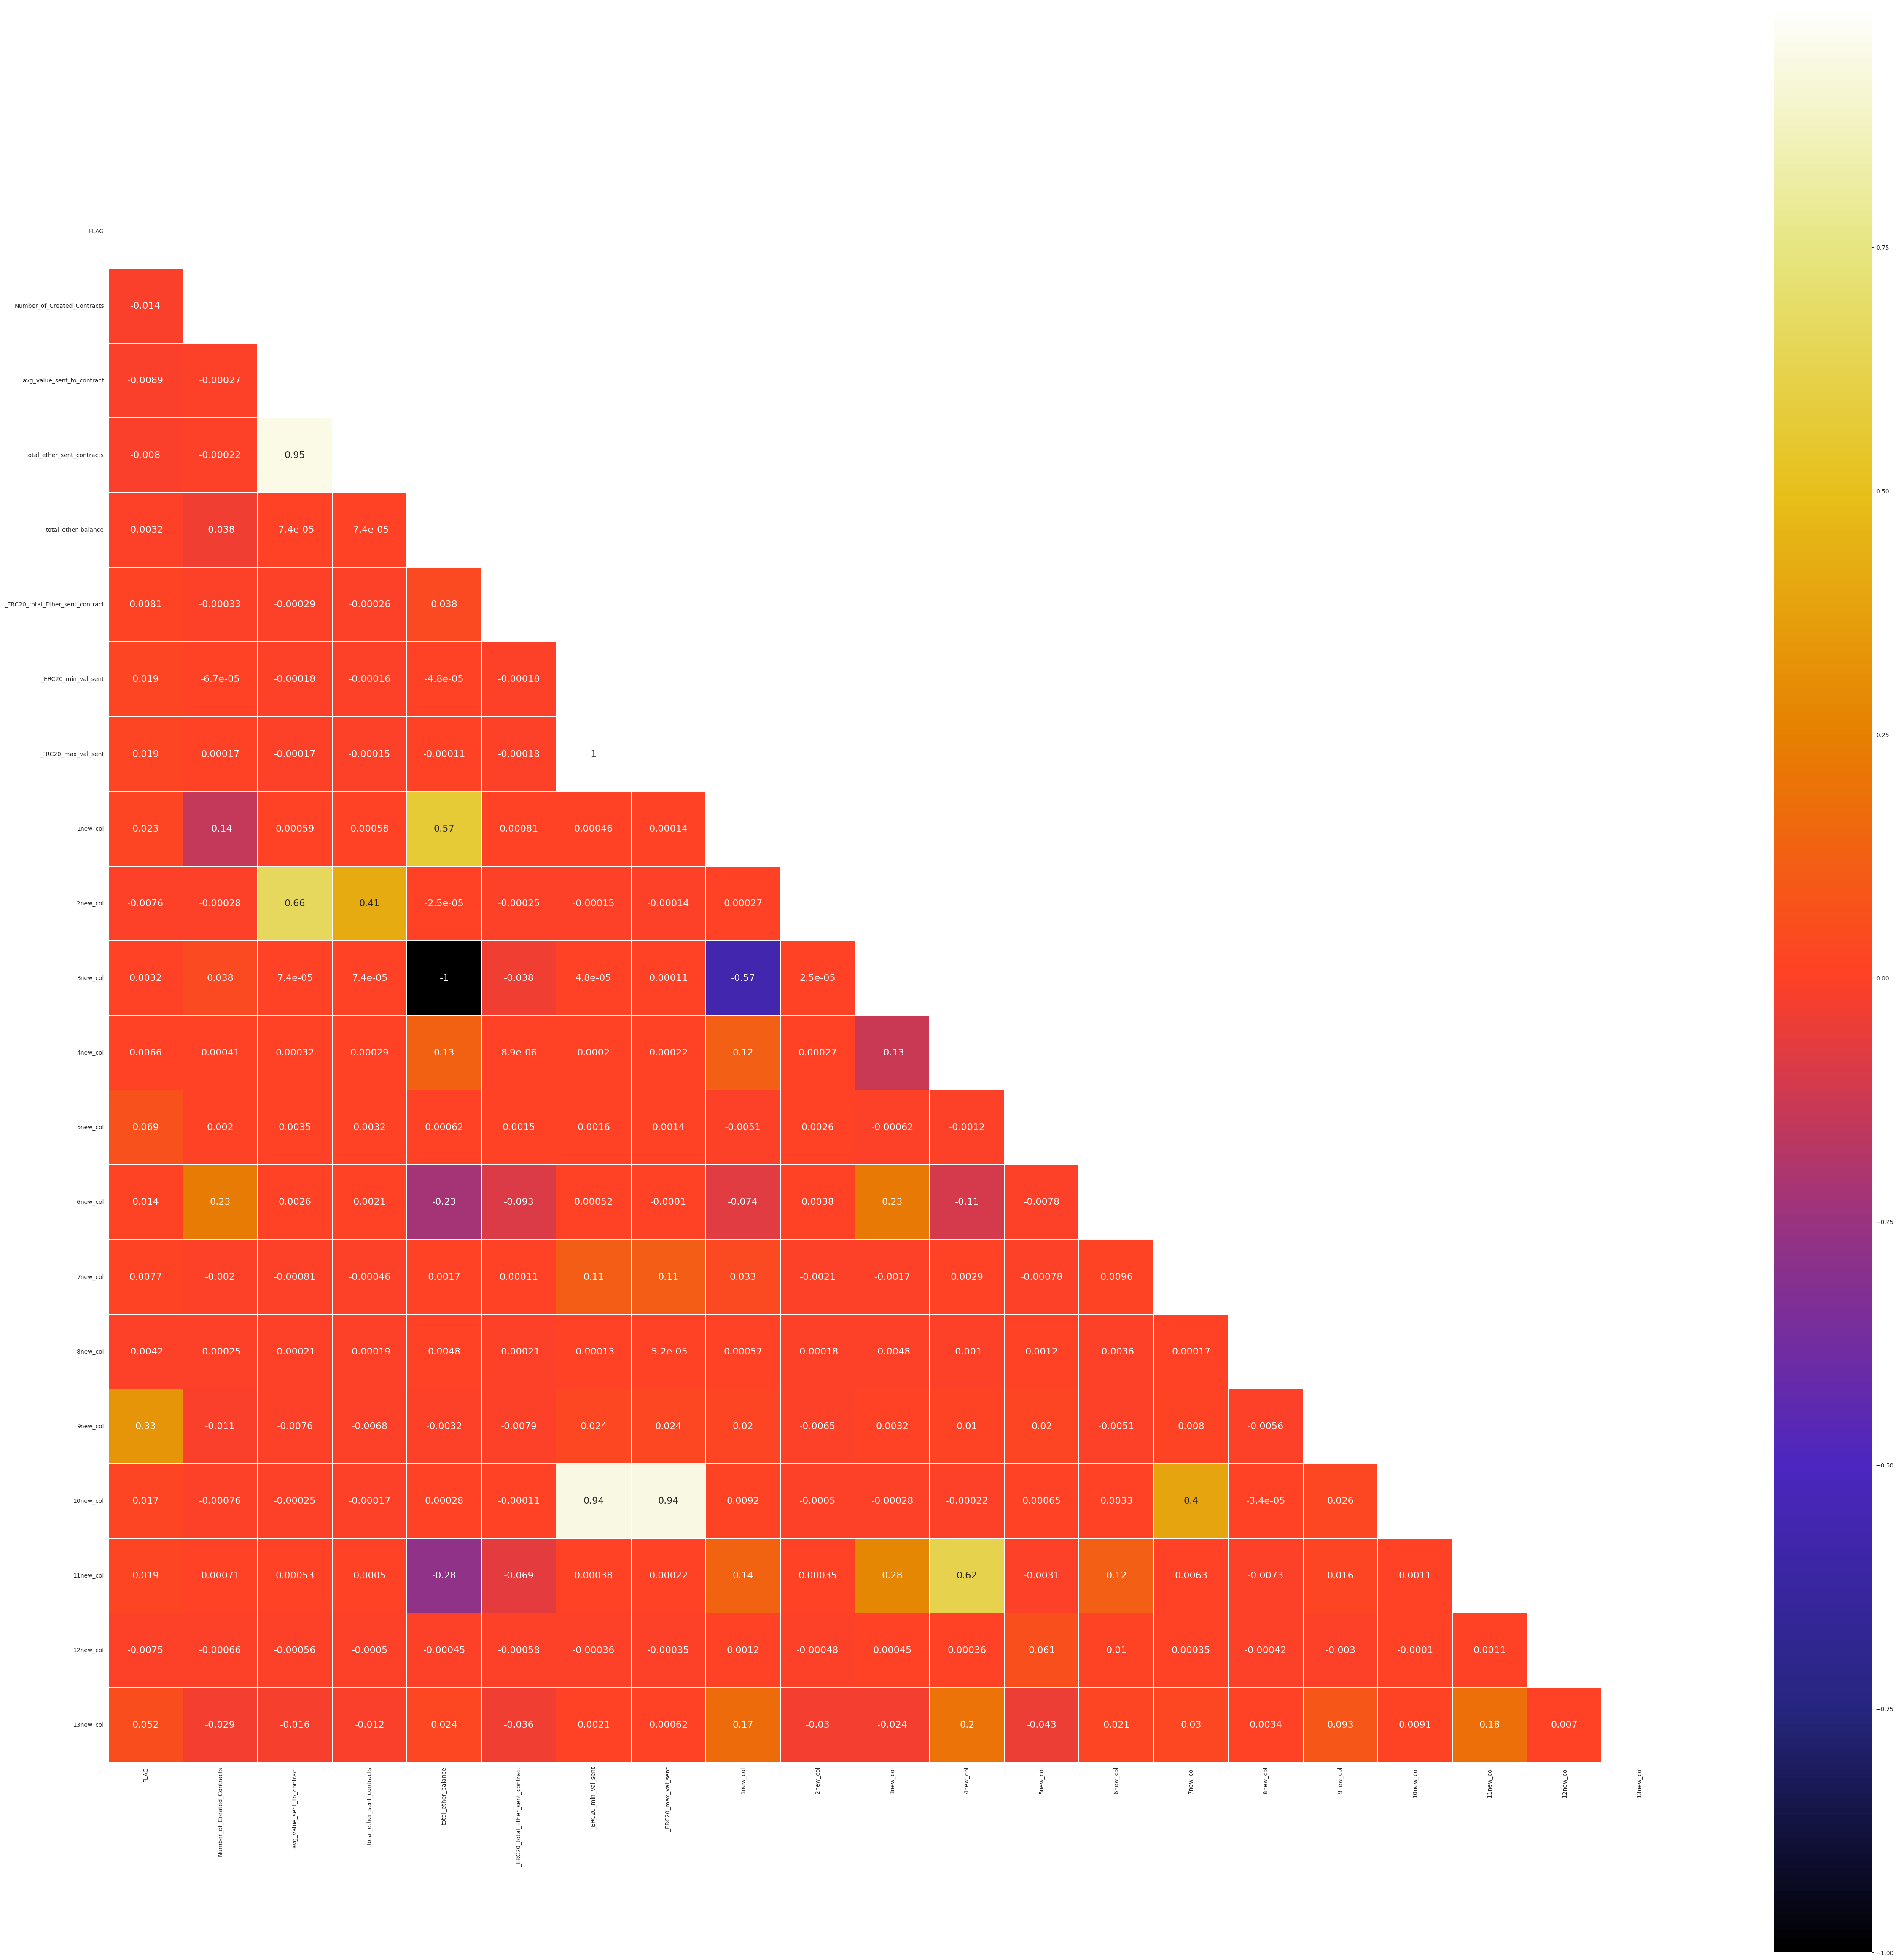

In [84]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(60,60))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 16})

In [85]:
X = df.drop(['FLAG'], axis=1)
y = df['FLAG']

X = X.replace([np.inf, -np.inf], np.nan)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


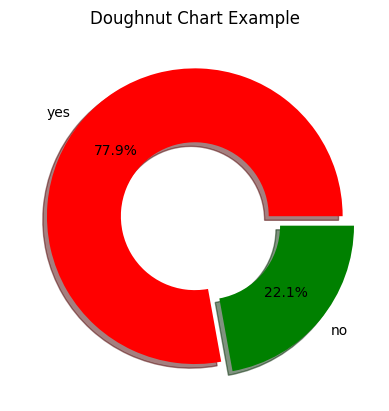

Class 0: 7662
Class 1: 2179


In [87]:
if 'FLAG' in df.columns:
    flag_counts = df['FLAG'].value_counts()

    plt.figure(dpi=100)
    plt.pie(flag_counts,
            labels=['yes','no'],  # Set labels correctly
            colors=['red', 'green'],
            explode=(0, 0.1),  # Ensure explode matches number of categories
            autopct='%1.1f%%',
            pctdistance=0.7,
            shadow=True,
            wedgeprops=dict(width=0.5))  # Creates doughnut effect

    plt.title('Doughnut Chart Example')
    plt.show()
else:
    print("Column 'FLAG' not found in the dataset.")
target_count = df['FLAG'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

In [88]:
!pip install imblearn --root-user-action=ignore


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [89]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

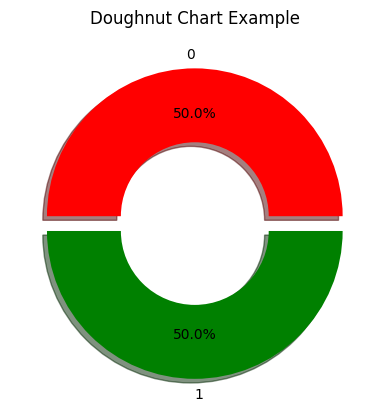

Class 0: 7662
Class 1: 7662


In [90]:
plt.figure(dpi=100)
plt.pie(
    y_sm.value_counts(),  # Counts of each category in y_sm
    labels=y_sm.value_counts().index,  # Correct labels (categories)
    colors=['red', 'green'],  # Colors for each category (adjust if necessary)
    explode=(0, 0.1),  # Slightly explode the minority class
    autopct='%1.1f%%',  # Percentage formatting
    pctdistance=0.7,  # Distance for percentage labels
    shadow=True,  # Add shadow to the chart
    wedgeprops=dict(width=0.5)  # Doughnut chart effect
)

# Add title
plt.title('Doughnut Chart Example')

# Show the plot
plt.show()
target_count = y_sm.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model building</p>

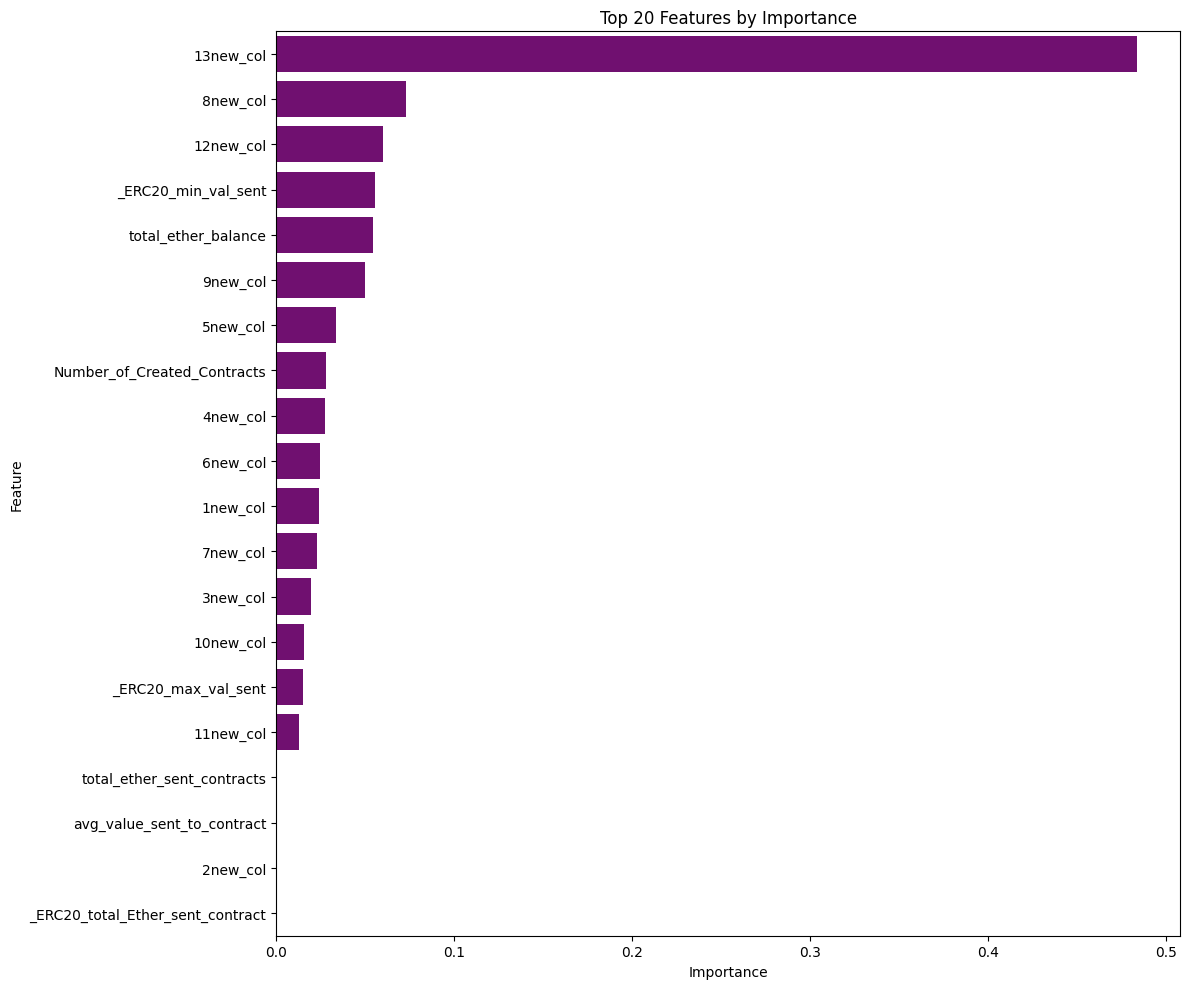

In [92]:
# Train a simple XGBoost model to get initial feature importance
model_basic = XGBClassifier(random_state=42)
model_basic.fit(X_train_scaled, y_train)

# Plot feature importance
plt.figure(figsize=(12, 10))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_basic.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature',color='Purple', data=feature_importance.head(20))
plt.title('Top 20 Features by Importance')
plt.tight_layout()
plt.show()

In [93]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Use a smaller subset for GridSearchCV to speed up the process
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)
print("\nBest parameters:", grid_search.best_params_)
print("Best ROC-AUC score:", grid_search.best_score_)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best ROC-AUC score: 0.994511937203494


In [94]:
# 5. Train final model with best parameters
best_model = XGBClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train_scaled, y_train)

# 6. Evaluate the model
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2299
           1       0.96      0.93      0.95       654

    accuracy                           0.98      2953
   macro avg       0.97      0.96      0.97      2953
weighted avg       0.98      0.98      0.98      2953



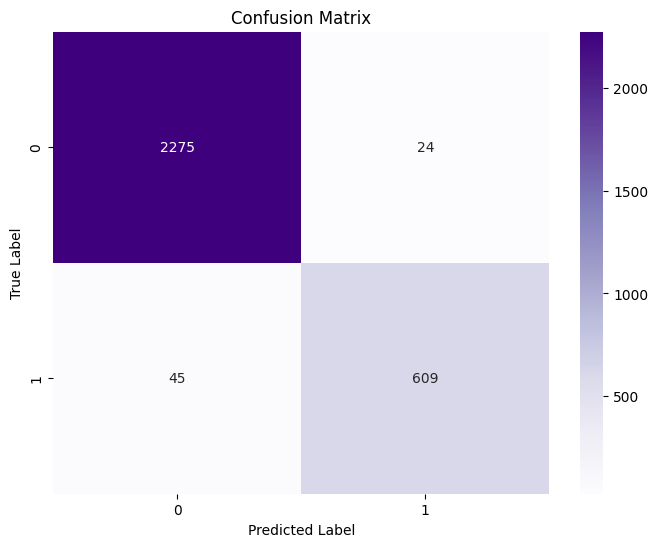

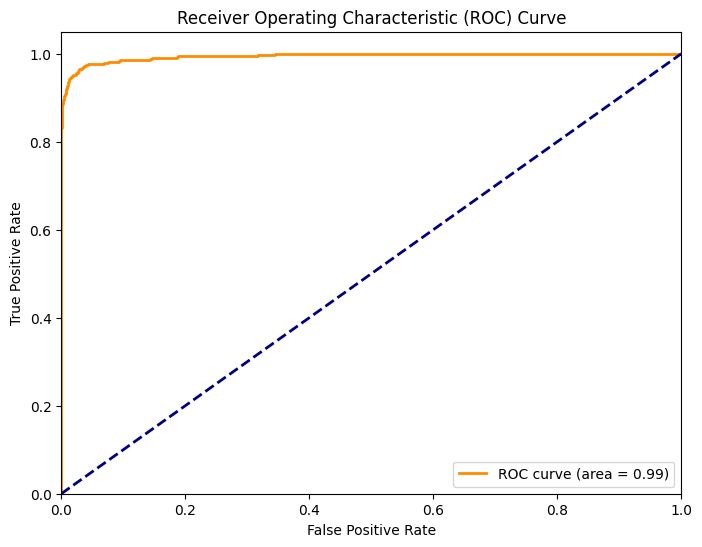

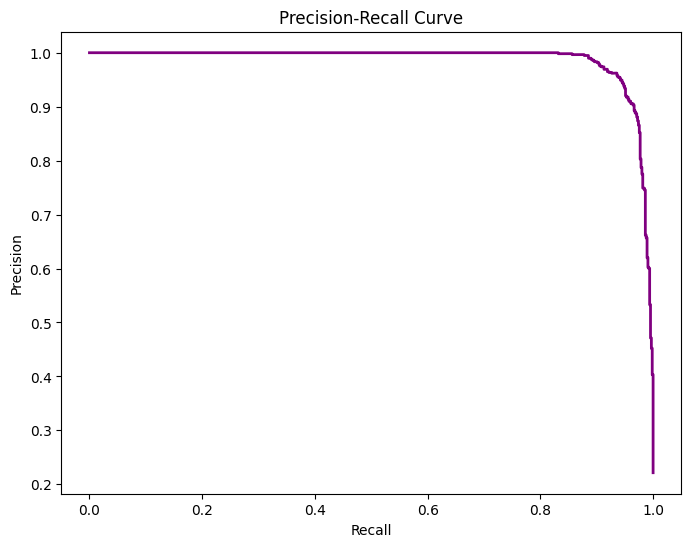

In [95]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='Purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

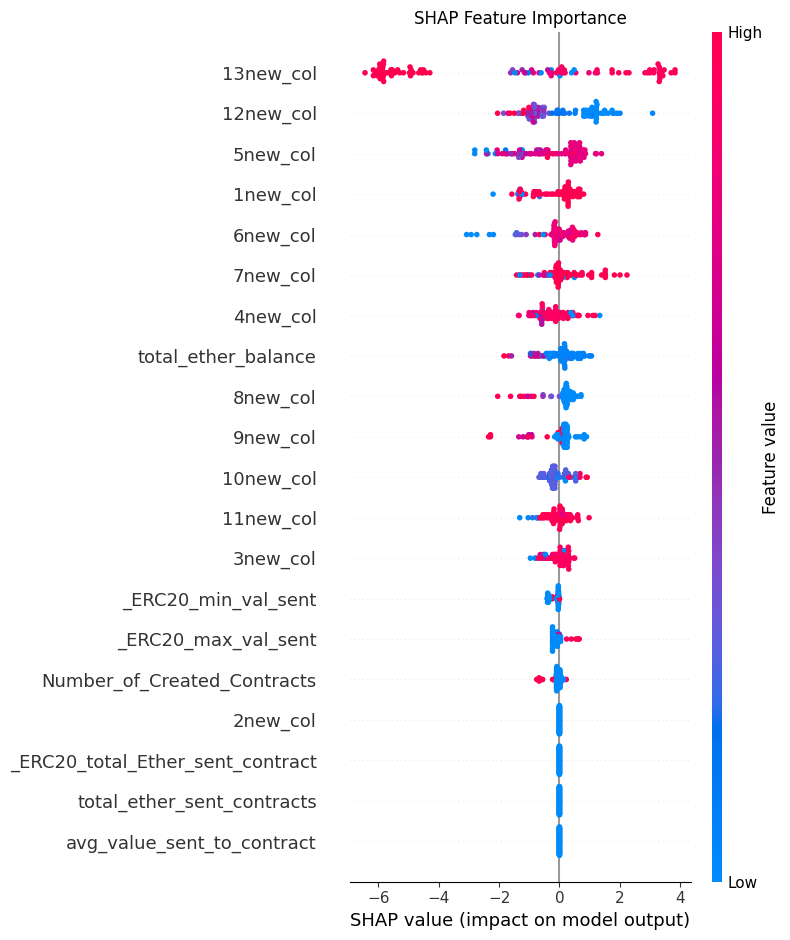

In [96]:
# 7. SHAP Analysis for Model Interpretability
# Create a small sample for SHAP analysis (for efficiency)
X_shap = X_test_scaled[:100]  # Using a subset of test data

# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_shap)

# Summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_shap, feature_names=X.columns, show=False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Evaluate best model</p>

In [101]:
bbest_model = XGBClassifier(**grid_search.best_params_, random_state=42)
bbest_model.fit(X_train_scaled, y_train)

# 6. Evaluate the model
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2299
           1       0.98      0.98      0.98      2299

    accuracy                           0.98      4598
   macro avg       0.98      0.98      0.98      4598
weighted avg       0.98      0.98      0.98      4598

